# Exploratory Data Analysis

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import folium


In [7]:
df = pd.read_csv('data/clean_listing.csv')
df.head()

,Unnamed: 0,index,host_response_rate,latitude,longitude,accommodates,bedrooms,beds,price,availability_365,...,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_since_years,distance_from_MRT,distance_from_Bus,distance_from_Mall,distance_from_School,distance_from_Food
0,0,1,0.9,1.34754,103.95958,1,1.0,1.0,81.0,242,...,0,0,1,0,12,0.842953,0.180102,7.976199,3.515767,0.785094
1,1,2,0.9,1.34531,103.96100,2,1.0,2.0,81.0,305,...,0,0,1,0,12,0.880282,0.205346,7.952045,3.786036,0.502588
2,2,3,1.0,1.29015,103.80814,1,1.0,1.0,52.0,273,...,0,0,1,0,12,0.549557,0.117975,4.230675,1.095807,0.169376
3,3,4,1.0,1.28836,103.81144,1,1.0,1.0,49.0,281,...,0,0,1,0,12,0.609339,0.040906,3.862544,0.685090,0.208523
4,4,5,0.9,1.34490,103.95979,4,3.0,5.0,175.0,242,...,0,0,1,0,12,0.738518,0.210803,7.816646,3.809634,0.506811


### Airbnb Visualization

In [8]:
m = folium.Map(location=[df.iloc[0]['latitude'],df.iloc[0]['longitude']], zoom_start=14, tiles="OpenStreetMap")
#for i in range(0,len(df)):
   #folium.Marker(
      #location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
      #popup=df.iloc[i]['neighbourhood_cleansed']
   #).add_to(m)

# Show the map again
#m

### Show the Coefficient Matrix

In [9]:
df_showHalfFeatures= df.iloc[:,2:18]
df_showAmmenities = df.iloc[:,19:71]
df_showAmmenities['price'] = df['price']
df_locationFeatures = df.iloc[:,72:119]
df_locationFeatures['price'] = df['price']
df_remainingFeatures = df.iloc[:,120:]
df_remainingFeatures['price'] = df['price']

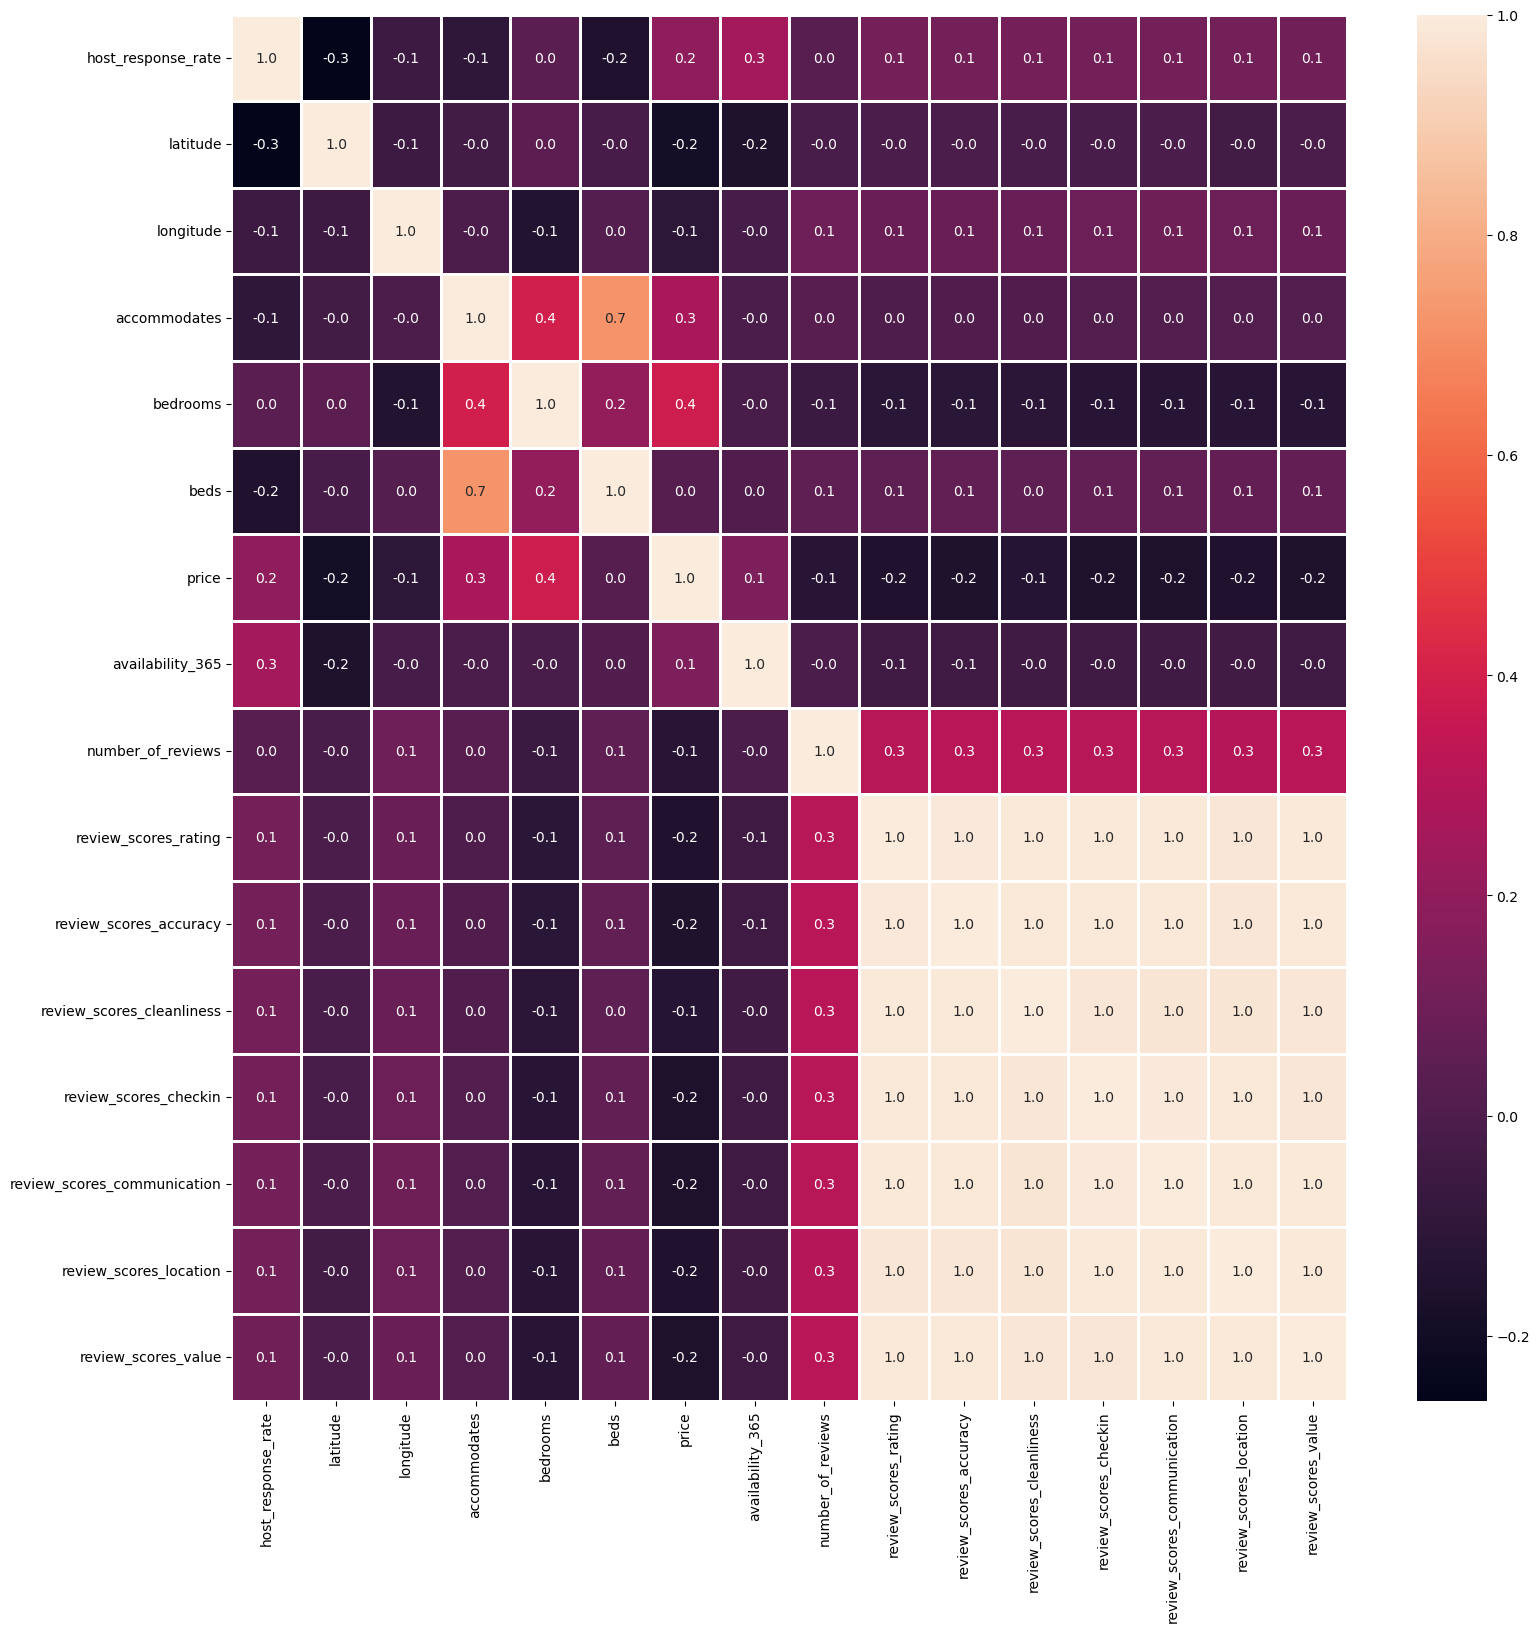

In [10]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df_showHalfFeatures.corr(),annot=True,linewidths=1,fmt='.1f',ax=ax)
plt.show()

### Based on the correlation map, we can see that bedrooms and the host_response_rate, might help the model to price the sales. 

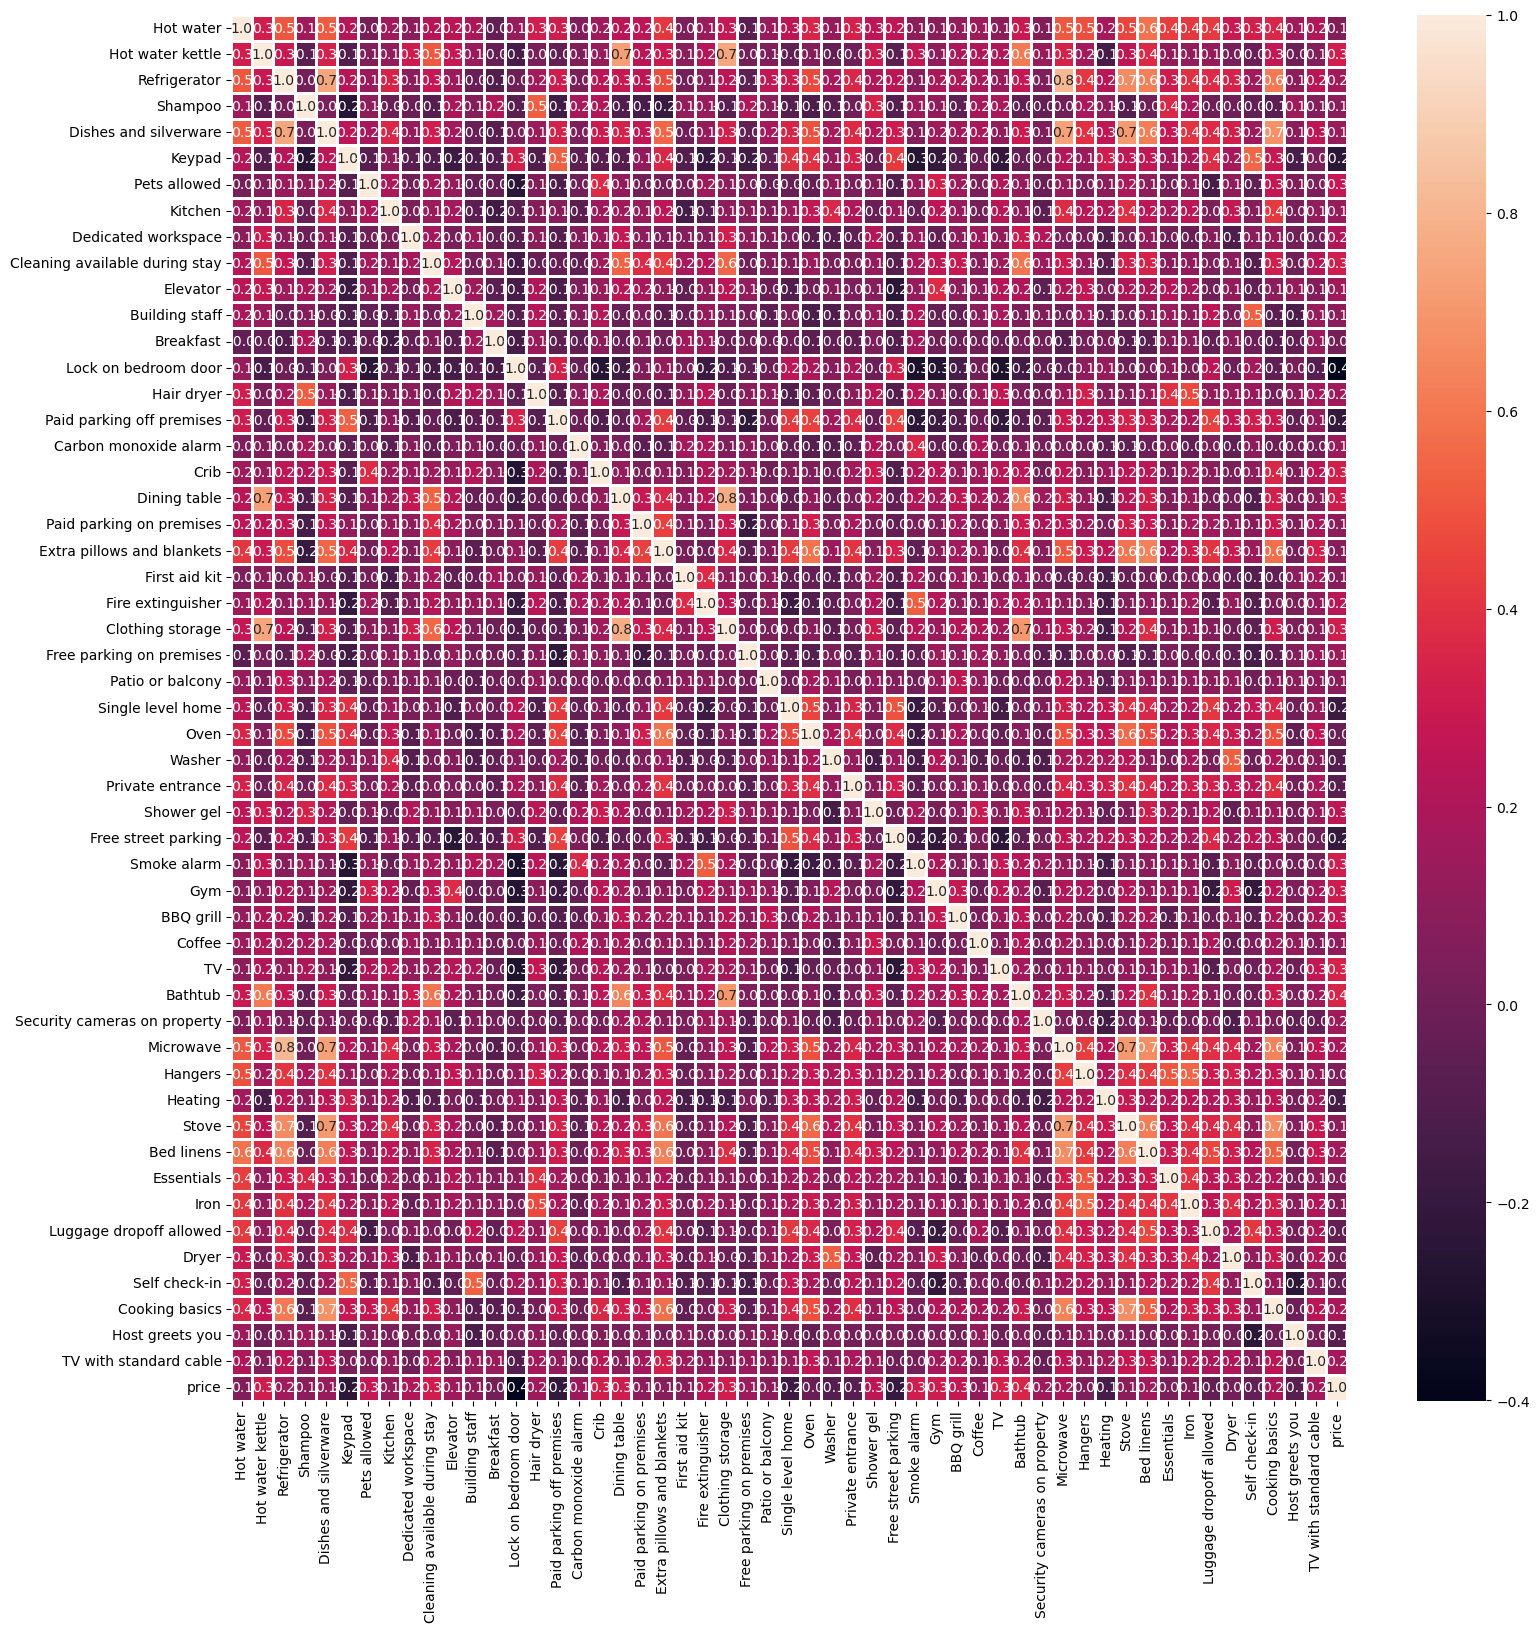

In [11]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df_showAmmenities.corr(),annot=True,linewidths=1,fmt='.1f',ax=ax)
plt.show() 

### Based on this correlation map, The different kinds of ammenities that the owners provide, might be one factor that will affect the sales price

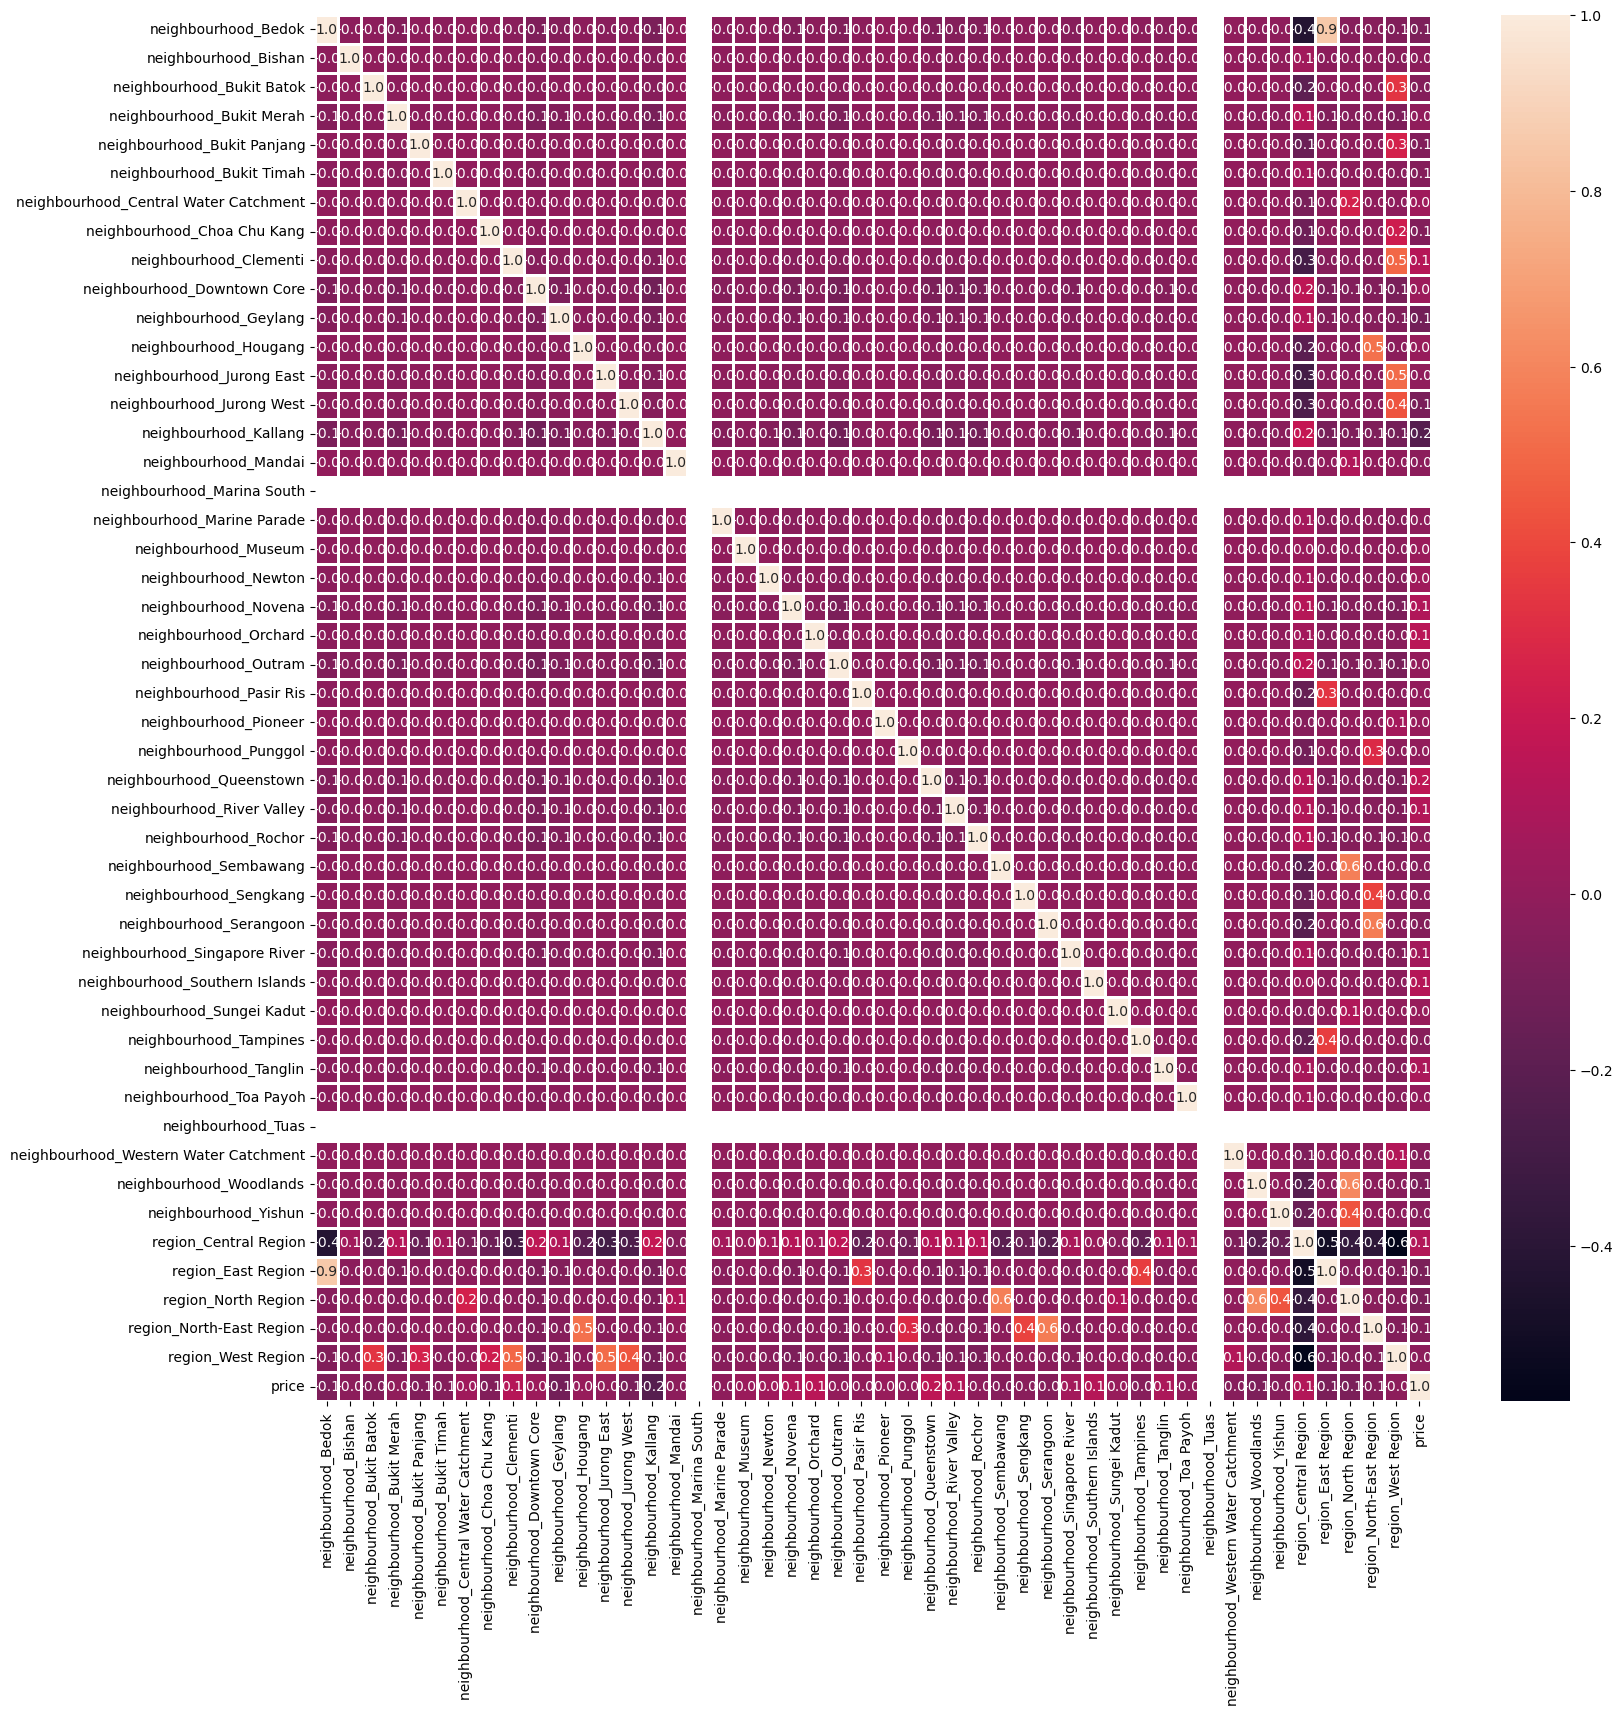

In [ ]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df_locationFeatures.corr(),annot=True,linewidths=1,fmt='.1f',ax=ax)
plt.show()

### Based on this correlation map, we can see that the locations of these airbnb might not be factor that cause the sale price of the room to be high/low. 

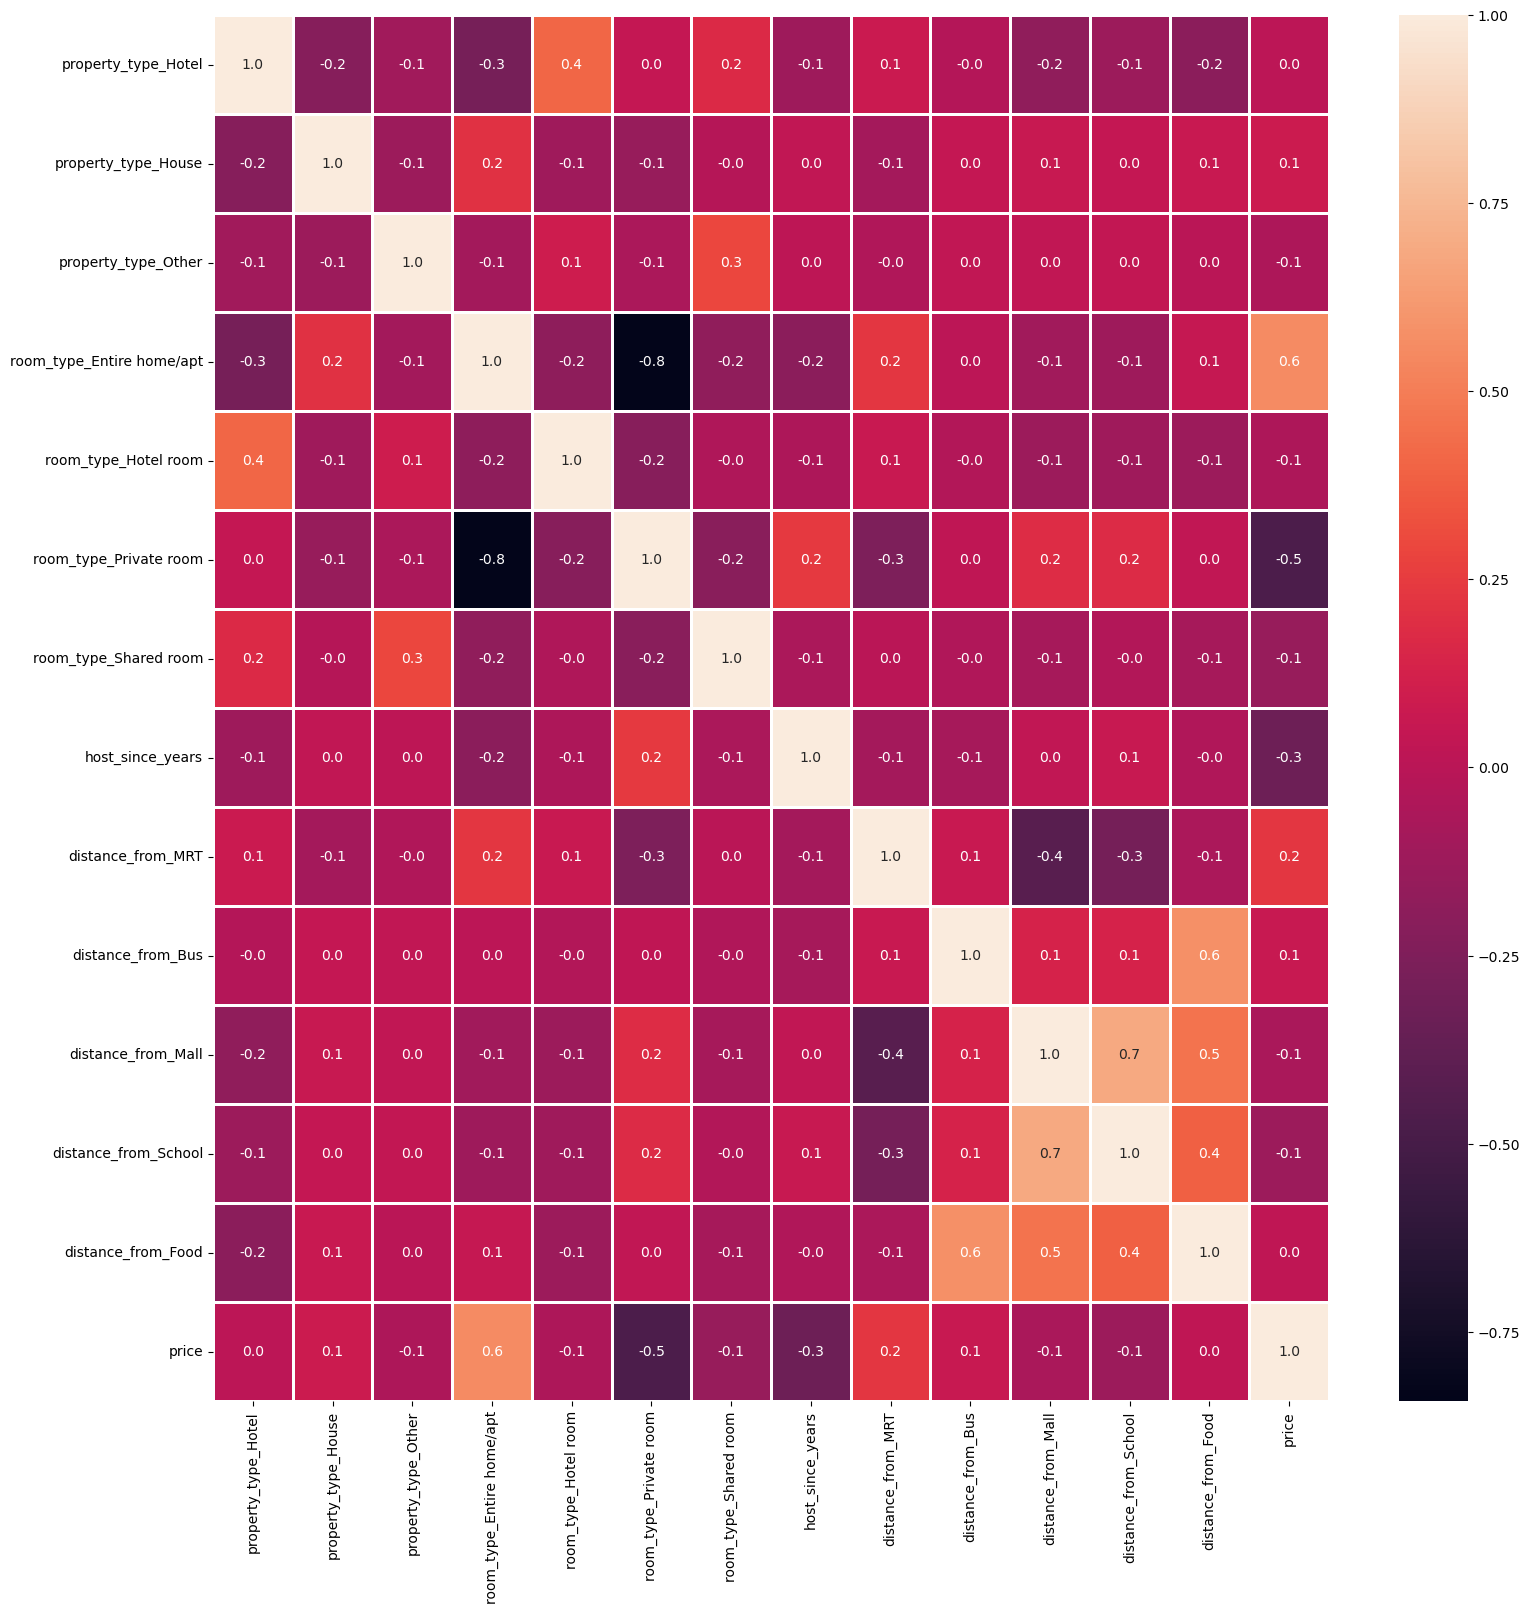

In [ ]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df_remainingFeatures.corr(),annot=True,linewidths=1,fmt='.1f',ax=ax)
plt.show()

### Based on the correlation map, we can see that the Room_type might be able to predict the sale price as there is negative correlation for private room and positive correlation for Entire home/apt. 

### Move the dependent variable to the first column

In [ ]:
column_to_move = df.pop("price")
df.insert(0, "price", column_to_move)

### Replace all True Values to 1 and False Values to 0 for prediction

In [ ]:
df.replace({False: 0, True: 1}, inplace=True)

In [ ]:
df.head()

,price,Unnamed: 0,index,host_response_rate,latitude,longitude,accommodates,bedrooms,beds,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,Keypad,Oven,Security cameras on property,Hair dryer,Cleaning available during stay,Luggage dropoff allowed,Breakfast,BBQ grill,Dryer,Paid parking off premises,TV,Clothing storage,Gym,Lock on bedroom door,Iron,Patio or balcony,Shampoo,Bed linens,Crib,Free parking on premises,Coffee,Microwave,Shower gel,Dining table,Private entrance,Carbon monoxide alarm,Stove,Pool,Dishes and silverware,Self check-in,Cooking basics,Washer,Smoke alarm,Refrigerator,TV with standard cable,Heating,Pets allowed,Essentials,Dedicated workspace,Fire extinguisher,Hot water kettle,Elevator,Bathtub,First aid kit,Paid parking on premises,Kitchen,Host greets you,Single level home,Building staff,Free street parking,Hangers,Extra pillows and blankets,Hot water,neighbourhood_Ang Mo Kio,neighbourhood_Bedok,neighbourhood_Bishan,neighbourhood_Bukit Batok,neighbourhood_Bukit Merah,neighbourhood_Bukit Panjang,neighbourhood_Bukit Timah,neighbourhood_Central Water Catchment,neighbourhood_Choa Chu Kang,neighbourhood_Clementi,neighbourhood_Downtown Core,neighbourhood_Geylang,neighbourhood_Hougang,neighbourhood_Jurong East,neighbourhood_Jurong West,neighbourhood_Kallang,neighbourhood_Mandai,neighbourhood_Marina South,neighbourhood_Marine Parade,neighbourhood_Museum,neighbourhood_Newton,neighbourhood_Novena,neighbourhood_Orchard,neighbourhood_Outram,neighbourhood_Pasir Ris,neighbourhood_Pioneer,neighbourhood_Punggol,neighbourhood_Queenstown,neighbourhood_River Valley,neighbourhood_Rochor,neighbourhood_Sembawang,neighbourhood_Sengkang,neighbourhood_Serangoon,neighbourhood_Singapore River,neighbourhood_Southern Islands,neighbourhood_Sungei Kadut,neighbourhood_Tampines,neighbourhood_Tanglin,neighbourhood_Toa Payoh,neighbourhood_Tuas,neighbourhood_Western Water Catchment,neighbourhood_Woodlands,neighbourhood_Yishun,region_Central Region,region_East Region,region_North Region,region_North-East Region,region_West Region,property_type_Apartment,property_type_Hotel,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_since_years,distance_from_MRT,distance_from_Bus,distance_from_Mall,distance_from_School,distance_from_Food
0,81.0,0,1,0.9,1.34754,103.95958,1,1.0,1.0,242,24,4.16,4.22,4.09,4.43,4.43,4.17,4.04,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,12,0.842953,0.180102,7.976199,3.515767,0.785094
1,81.0,1,2,0.9,1.34531,103.96100,2,1.0,2.0,305,47,4.41,4.39,4.52,4.63,4.64,4.50,4.36,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,12,0.880282,0.205346,7.952045,3.786036,0.502588
2,52.0,2,3,1.0,1.29015,103.80814,1,1.0,1.0,273,22,4.40,4.16,4.26,4.47,4.42,4.53,4.63,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,12,0.549557,0.117975,4.230675,1.095807,0.169376
3,49.0,3,4,1.0,1.28836,103.81144,1,1.0,1.0,281,14,4.50,4.69,4.23,4.62,4.54,4.62,4.46,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,12,0.609339,0.040906,3.862544,0.685090,0.208523
4,175.0,4,5,0.9,1.34490,103.95979,4,3.0,5.0,242,12,4.83,4.67,4.75,4.58,4.67,4.33,4.45,1,0,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1

In [383]:
#d1= df[['host_response_rate','bedrooms','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]
#d3 = df[['room_type_Entire home/apt','room_type_Hotel room','room_type_Private room','room_type_Shared room','distance_from_MRT']]
#result = pd.concat([d1, df_showAmmenities,d3], axis=1, join='inner')
#pd.set_option('display.max_columns',None)
#X.head()